# lab1_2

In [38]:
import math
import numpy as np
import sympy as sm
from sympy import Derivative
from itertools import groupby
import matplotlib.pyplot as plt
from tabulate import tabulate
from pprint import pprint

from IPython.display import display, Latex, clear_output

In [39]:
t, y =sm.symbols('t, y')
x=sm.Function('x')
p=sm.Function('p')

In [40]:
sm.init_printing(use_latex='mathjax')
x, y, c = sm.symbols('x, y, c', real=True)
C1, C2 = sm.symbols("C1, C2", real=True)
c = sm.symbols("c")
u = sm.Function('u')
ux = u(x)
ux1 = Derivative(u(x), x)
ux2 = Derivative(u(x), (x, 2))

h, uup1, uum1, uu0 = sm.symbols('h, u_i+1, u_i-1, u_i')
uux1 = (uup1 - uum1)/(2*h)
uux2 = (uup1 - 2*uu0 + uum1)/(h**2)

In [43]:
zad1 = {
    'p': sm.sqrt(1 + x**2)*0.4,
    'q': 4*(1 + x**2),
    'f': 20*sm.exp(-x),
    'a': 0, 'UA': 0,
    'b': 2.5, 'UB': 0,
    'E': 0.05
}

## тестовый пример

In [51]:
mainEq = sm.Eq(ux2 + zad1['p']*ux1 + zad1['q']*ux,  zad1['f'])
mainEq

       ________                                2               
      ╱  2      d          ⎛   2    ⎞         d              -x
0.4⋅╲╱  x  + 1 ⋅──(u(x)) + ⎝4⋅x  + 4⎠⋅u(x) + ───(u(x)) = 20⋅ℯ  
                dx                             2               
                                             dx                

### апроксимированное уравнение

In [52]:
#apro = mainEq.subs({ux: uu0, ux2: uux2, ux1: uux1 })
apro = sm.Eq(uux2 + zad1['p']*uux1 + zad1['q']*uu0,  zad1['f'])
apro

                                     ________                               
                                    ╱  2                                    
   ⎛   2    ⎞   0.2⋅(uᵢ₊₁ - uᵢ₋₁)⋅╲╱  x  + 1    -2⋅uᵢ + uᵢ₊₁ + uᵢ₋₁       -x
uᵢ⋅⎝4⋅x  + 4⎠ + ───────────────────────────── + ─────────────────── = 20⋅ℯ  
                              h                           2                 
                                                         h                  

### вычисление шага, переменных и массива абсцисс

In [53]:
n = 5  # n=6
hh = (zad1['b'] - zad1['a']) / n
us = sm.symbols(' '.join([f"u{i}" for i in range(n+1)]))
list_x = [zad1['a'] + hh*i for i in range(n+1)]
display(hh)
display(us)
display(list_x)

0.5

(u₀, u₁, u₂, u₃, u₄, u₅)

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5]

### система

In [47]:
tyts = [apro.subs({x: list_x[i], h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)]
tyts.append(sm.Eq(us[0], zad1['UA']))
tyts.append(sm.Eq(us[5], zad1['UB']))
display(*tyts)

3.55278640450004⋅u₀ - 3.0⋅u₁ + 4.44721359549996⋅u₂ = 12.1306131942527

3.43431457505076⋅u₁ + 4.56568542494924⋅u₃ = 7.35758882342885

3.2788897449072⋅u₂ + 5.0⋅u₃ + 4.7211102550928⋅u₄ = 4.4626032029686

3.10557280900008⋅u₃ + 12.0⋅u₄ + 4.89442719099992⋅u₅ = 2.70670566473225

u₀ = 0

u₅ = 0

вычисление системы

In [48]:
result = sm.solve(tyts, us)
display(*result.items())

(u₀, 0.0)

(u₁, 18.4651461227225)

(u₂, 15.1839011354769)

(u₃, -12.278010072694)

(u₄, 3.40307999125999)

(u₅, 0.0)

## основная задача

In [49]:
def solve1(zad, n):
    ## апроксимированное уравнение
    apro = sm.Eq(uux2 + zad['p']*uux1 + zad['q']*uu0,  zad['f'])
    ## определяем шаг
    hh = (zad['b'] - zad['a']) / n
    ## переменные u1-u*
    us = sm.symbols(' '.join([f"u{i}" for i in range(n+1)]))
    ## массив обсцисс
    list_x = [zad['a'] + hh*i for i in range(n+1)]
    
    ## система из n+1 уравнений
    tyts = [apro.subs({x: list_x[i], h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)]
    tyts.append(sm.Eq(us[0], zad['UA']))
    tyts.append(sm.Eq(us[5], zad['UB']))
    
    result = sm.solve(tyts, us)
    return list_x, list(result.values())

### find accuracy

шаг 0.125000


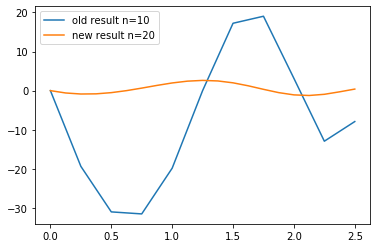

qwerty: q


In [50]:
E = zad1['E']
E_cur = 0
n = 10
result = solve1(zad1, n)
n *= 2
while(True):
    hh = (zad1['b'] - zad1['a']) / n
    plt.plot(*result, label=f"old result n={int(n/2)}")
    result = solve1(zad1, n)
    plt.plot(*result, label=f"new result n={n}" )
    plt.legend(loc='upper left')
    print("шаг %f" % hh)
    plt.show()   
    #display(*solve1(zad1, n))
    if(input("qwerty: ") == 'q'):
        break
    n *= 2
    clear_output()